In [1]:
from itsdangerous import json
from torch.utils import data
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms.functional as TF
import torchvision as tv

from models import utils, caption
from datasets import coco
from configuration import Config
from engine import train_one_epoch, evaluate

from PIL import Image
import numpy as np
import random
import os
import json

from transformers import AutoModelForPreTraining, AutoTokenizer
from normalizer import normalize

from transformers import BertTokenizer
from datasets.utils import nested_tensor_from_tensor_list, read_json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [10]:
location = 'Bangla Dataset'

In [2]:
with open('captions.json','r',encoding="utf8") as file:
    captions = json.load(file)

In [3]:
location = 'G:\\Pioneer Alpha\\Task 3'
image_names = sorted([int(name.split('.')[0]) for name in os.listdir(os.path.join(location,'images','images'))])
image_names = [str(name)+'.png' for name in image_names]

In [ ]:
new_annotations = []
i=0
for i in range(i,i+10):

    img_name = image_names[i]
    
    img = mpimg.imread(os.path.join('G:\\Pioneer Alpha\\Task 3\\images\\images',img_name))
    imgplot = plt.imshow(img)
    plt.show()
    print(img_name)

    print('\n',1,"       :",end='')
    if i!=0:
        for sentence in captions[i-1]['caption']:
                print(sentence)
    print('\n',2,"       :",end='')
    for sentence in captions[i]['caption']:
            print(sentence)
    print('\n',3,"       :",end='')
    for sentence in captions[i+1]['caption']:
            print(sentence)
    a = input()
    if a == '1':
        new_annotations.append({'filename':img_name,'caption':captions[i-1]})
    elif a == '2':
        new_annotations.append({'filename':img_name,'caption':captions[i]})
    elif a == '3':
        new_annotations.append({'filename':img_name,'caption':captions[i+1]})
    elif a == '0':
        break


Captions of 71.png:
সবুজ ঘাসের উপর বালক, বালিকা ও শিশু আছে।
২জন মেয়ে একজন সাদা জামাকাপর আরেকজন কালো লাল জামাকাপড়  পরে কানামাছি খেলছে, তাদের পিছনে এলোমেলো কয়েকজন বাচ্চা দাড়িয়ে খেলছে একসাথে। 


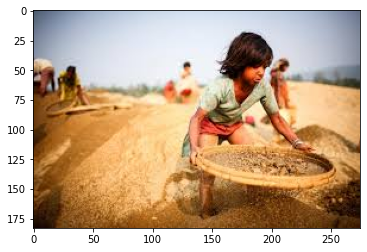

Captions of 72.png:
একটি শিশু কাজ করছে। পিছনে কয়েকজন মানুষ আছে।
একটি বাচ্চা মেয়ে সাদা জামা লাল হাফ প্যান্ট পরে একটি চালুনি দিয়ে বালু চালছে, তার পিছনে ঝাপসা কয়েকজন মানুষ দেখা যায়। 


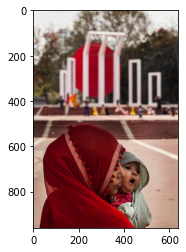

Captions of 73.png:
একজন মহিলা একটি শিশু কোলে নিয়ে আছে।
লাল উরনা পরে একটি সাদা কাপড় পরা শিশুকে কুলে নিয়ে আছে একটি মহিলা, পিছনে ঝাপসা কিছু মানুষসহ  শহিদ মিনার দেখা যায়। 


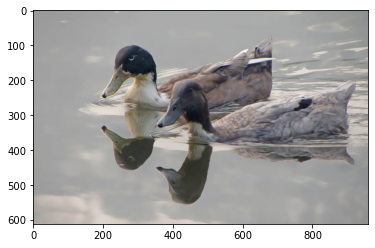

Captions of 74.png:
পানিতে দুইটি হাঁস আছে।
পানিতে দুইটি ধুসর রঙের  হাঁস  একসাথে ভেসে চলে যাচ্ছে । 


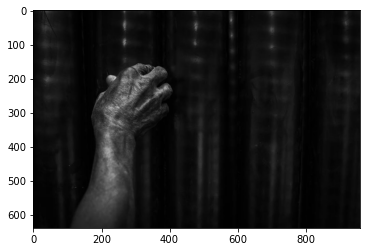

Captions of 75.png:
একটি হাত দেখা যাচ্ছে।
কালো বিকৃত একটি মানুষের হাত কালো কিছু ধরে আছে। 


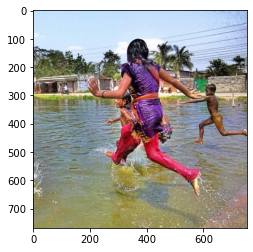

Captions of 76.png:
পানিতে একজন মহিলা ও দুইটি শিশু দৌড় দিচ্ছে।
৪  জন মানুষ পানিতে খেলা করছে, যার মাঝে গুলাপি জামা পরা একটি মেয়ে এবং হাফ প্যান্ট পরা ৩ টি  বাচ্চা মেয়ে। 


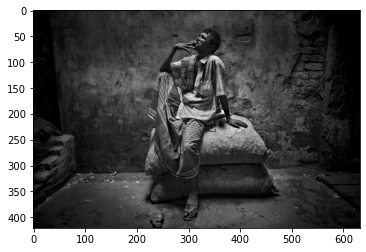

Captions of 77.png:
একজন পুরুষ মানুষ বসে আছে। 
একজন পুরুষ গুদাম ঘরে  ২ টি বস্তার উপরে বসে লুঙ্গী শার্ট পরে কাঁদে একটি গামছা নিয়ে বিড়ি খাচ্ছে। 


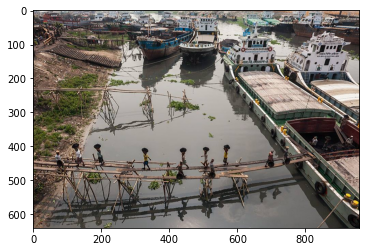

Captions of 78.png:
জলাশয়ে কয়েকটি জাহাজ আছে। কয়েকজন মানুষ কাজ করছে।
কয়েকটা নৌকা যার মাঝে একটি নৌকা থেকে কিছু পুরুষ মানুষ মাথায় পাথি নিয়ে কয়লা নামাচ্ছে। 


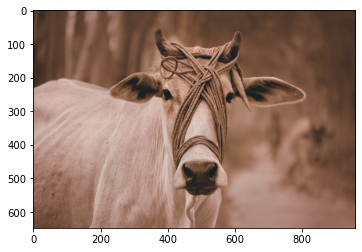

Captions of 79.png:
একটি গরু তাকিয়ে আছে।
একটি সাদা রঙের গরুর  মাথায় কিছু দরি প্যাঁচানো দেখা যাচ্ছে। 


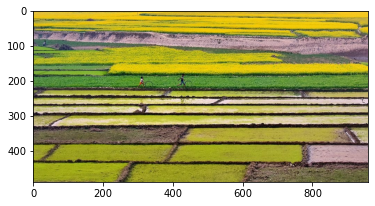

Captions of 80.png:
দুইজন বালক যাচ্ছে। চারদিকে ফসলের মাঠ।
চারা ধানগাছের ক্ষেতের ছোট রাস্তা দিয়ে ২ টি ছোট ছেলে সাইকেলের টায়ার দিয়ে গাড়ি চালিয়ে যাচ্ছে। 


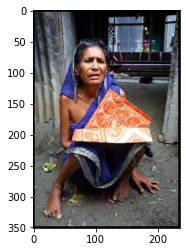

In [23]:
for annotation in captions[50]:

        print("Captions of {}:".format(annotation["filename"]))

        for sentence in annotation["caption"]:
        
            print(sentence)
    
        img = mpimg.imread(os.path.join('G:\\Pioneer Alpha\\Task 3\\images\\images',annotation["filename"]))
        imgplot = plt.imshow(img)
        plt.show()

In [11]:
with open(os.path.join(location,'captions.json'),'r',encoding="utf8") as file:
    captions = json.load(file)

In [12]:
len(captions)

9154

In [13]:
with open(os.path.join(location,'new_annotations.json'),'r',encoding="utf8") as file:
    new_captions = json.load(file)

In [14]:
np.random.shuffle(new_captions)

train_num = int(0.8 * len(new_captions))

train_annotations = new_captions[:train_num ]
val_annotations = new_captions[train_num :]

In [20]:
import shutil
for annotation in train_annotations:
    shutil.copy2(os.path.join(location,'images',annotation['filename']),os.path.join(location,'training'))

filename = os.path.join(location,'training','train_annotations.json')
with open(filename,'w',encoding='utf8') as file:
    json.dump(train_annotations,file,ensure_ascii=False)

for annotation in val_annotations:
    shutil.copy2(os.path.join(location,'images',annotation['filename']),os.path.join(location,'validation'))

filename = os.path.join(location,'validation','val_annotations.json')
with open(filename,'w',encoding='utf8') as file:
    json.dump(val_annotations,file,ensure_ascii=False)